Tổng số ảnh có nhãn: 5280
Tổng số metadata ảnh: 5280
Phân bố nhãn:
label
0    3360
1    1920
Name: count, dtype: int64


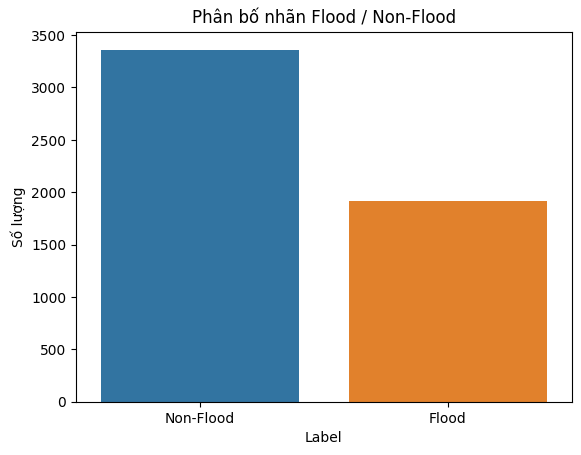


Thiếu dữ liệu trong metadata:
Thiếu title: 92
Thiếu description: 1936
Thiếu user_tags: 403


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


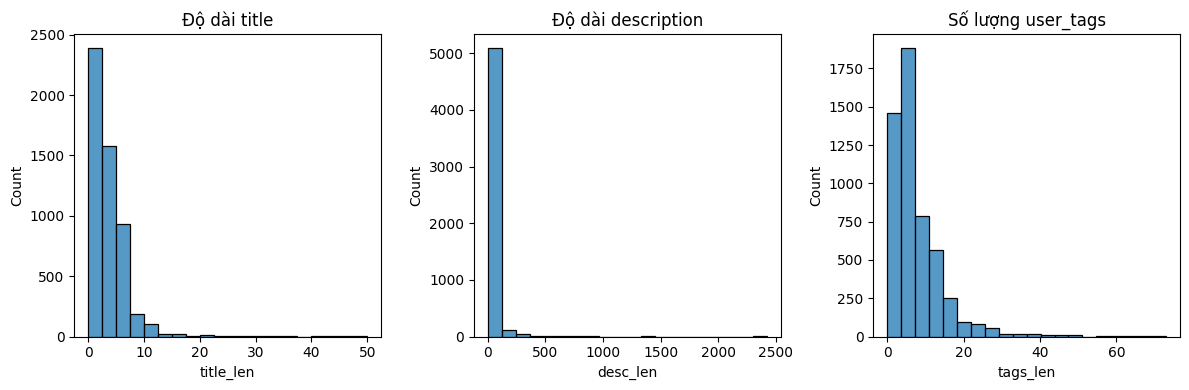


🔍 Hiển thị ảnh mẫu với label = 0 (Non-Flood)


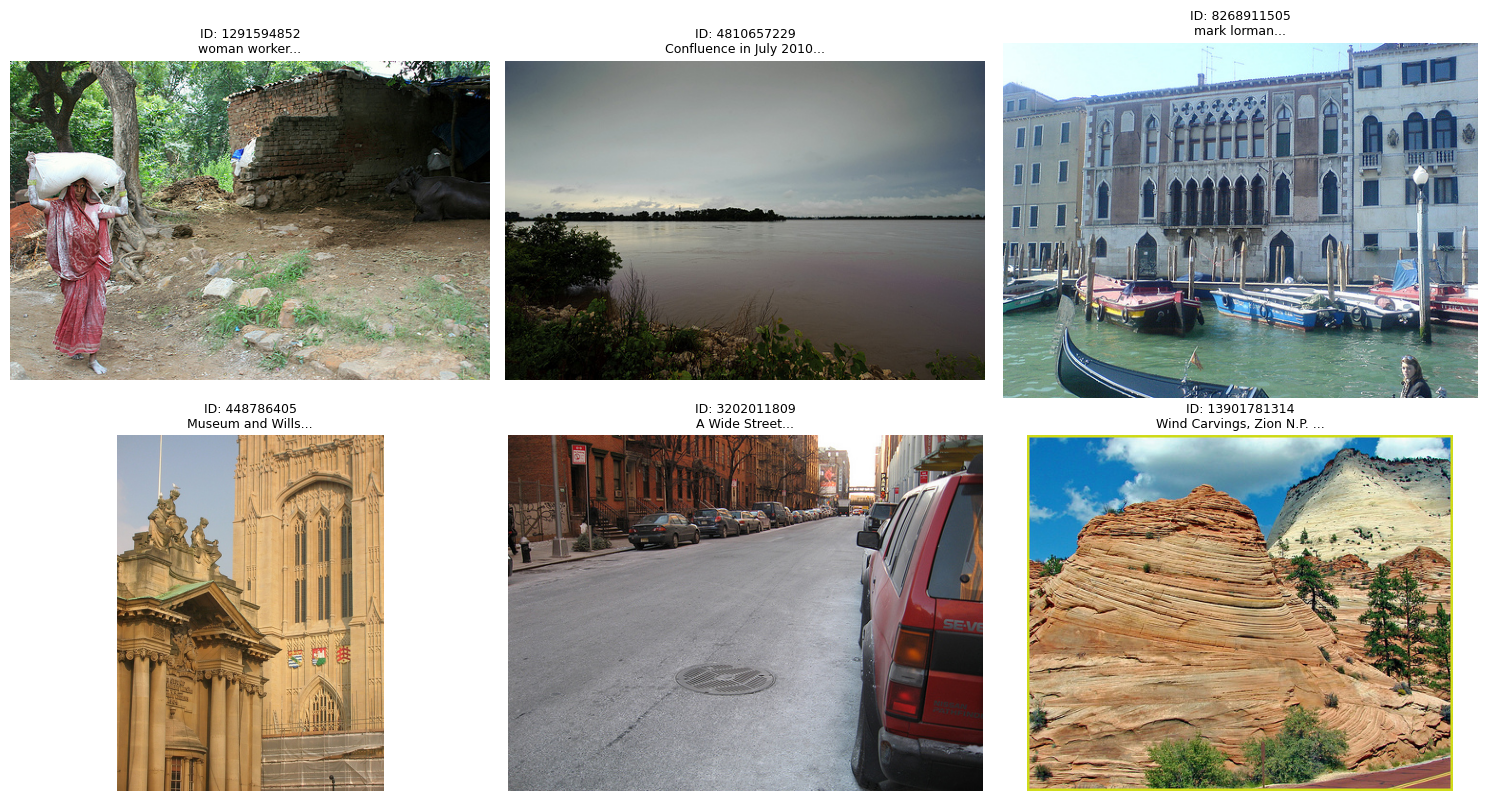


🔍 Hiển thị ảnh mẫu với label = 1 (Flood)


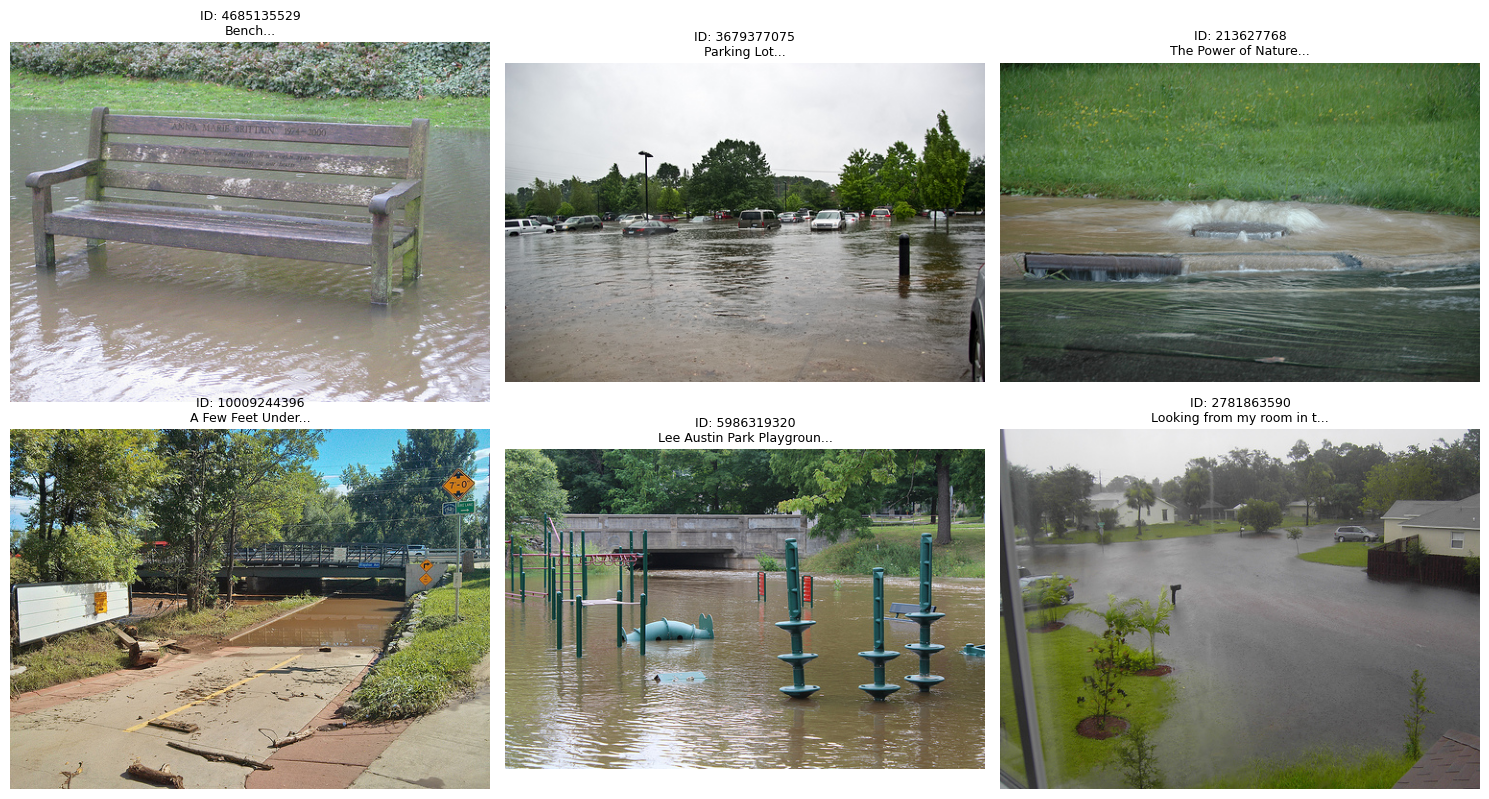

In [5]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path

# === Config path ===
train_img_path = '/kaggle/input/2025-sum-dpl-302-m/devset_images/devset_images'
train_json_path = '/kaggle/input/2025-sum-dpl-302-m/devset_images_metadata.json'
train_label_path = '/kaggle/input/2025-sum-dpl-302-m/devset_images_gt.csv'

# === Load dữ liệu ===
label_df = pd.read_csv(train_label_path)
with open(train_json_path, 'r') as f:
    metadata_json = json.load(f)
metadata_df = pd.DataFrame(metadata_json['images'])

# === Tổng quan ===
print(f"Tổng số ảnh có nhãn: {len(label_df)}")
print(f"Tổng số metadata ảnh: {len(metadata_df)}")
print("Phân bố nhãn:")
print(label_df['label'].value_counts())

# === Biểu đồ phân bố nhãn ===
sns.countplot(data=label_df, x='label')
plt.title("Phân bố nhãn Flood / Non-Flood")
plt.xticks([0, 1], ["Non-Flood", "Flood"])
plt.xlabel("Label")
plt.ylabel("Số lượng")
plt.show()

# === Kiểm tra thiếu dữ liệu trong metadata ===
metadata_df['title'] = metadata_df['title'].fillna('')
metadata_df['description'] = metadata_df['description'].fillna('')
metadata_df['user_tags'] = metadata_df['user_tags'].apply(lambda x: x if isinstance(x, list) else [])

print("\nThiếu dữ liệu trong metadata:")
print("Thiếu title:", sum(metadata_df['title'] == ''))
print("Thiếu description:", sum(metadata_df['description'] == ''))
print("Thiếu user_tags:", sum(metadata_df['user_tags'].apply(lambda x: len(x) == 0)))

# === Phân tích độ dài văn bản ===
metadata_df['title_len'] = metadata_df['title'].apply(lambda x: len(x.split()))
metadata_df['desc_len'] = metadata_df['description'].apply(lambda x: len(x.split()))
metadata_df['tags_len'] = metadata_df['user_tags'].apply(lambda x: len(x))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(metadata_df['title_len'], bins=20)
plt.title("Độ dài title")

plt.subplot(1, 3, 2)
sns.histplot(metadata_df['desc_len'], bins=20)
plt.title("Độ dài description")

plt.subplot(1, 3, 3)
sns.histplot(metadata_df['tags_len'], bins=20)
plt.title("Số lượng user_tags")

plt.tight_layout()
plt.show()


def show_images_by_label(label_value, num_samples=6):
    print(f"\n🔍 Hiển thị ảnh mẫu với label = {label_value} ({'Flood' if label_value==1 else 'Non-Flood'})")
    sample_ids = label_df[label_df['label'] == label_value].sample(num_samples*4, random_state=42)['id'].astype(str).tolist()

    shown = 0
    plt.figure(figsize=(15, 8))
    
    for img_id in sample_ids:
        # Tìm đúng phần mở rộng ảnh
        for ext in [".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".webp"]:
            img_path = Path(train_img_path) / f"{img_id}{ext}"
            if img_path.exists():
                break
        else:
            continue 

        # Tìm metadata tương ứng
        matched_rows = metadata_df[metadata_df['image_id'].astype(str) == img_id]
        if matched_rows.empty:
            continue
        text_row = matched_rows.iloc[0]
        title = text_row['title']
        desc = text_row['description']

        try:
            image = Image.open(img_path).convert("RGB")
            plt.subplot(2, 3, shown + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"ID: {img_id}\n{title[:25]}...", fontsize=9)
            shown += 1
        except Exception as e:
            print(f"Lỗi đọc ảnh {img_id}: {e}")
        
        if shown >= 6:
            break

    if shown == 0:
        print("Không tìm thấy ảnh hợp lệ để hiển thị.")
    plt.tight_layout()
    plt.show()



show_images_by_label(0)
show_images_by_label(1)

